<a href="https://colab.research.google.com/github/alexander-billings/stroke_prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction DataSet

In [1]:
import pandas as pd

In [40]:
link_to_file = "https://raw.githubusercontent.com/alexander-billings/stroke_prediction/main/stroke_data.csv"
df = pd.read_csv(link_to_file, index_col = 'id')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Cleaning

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## Are there columns that should be dropped?

### None at a glance

## Are there duplicate columns?

In [42]:
df.duplicated().sum()

0

### No duplicate rows found

## Are there any rows with missing data?

In [43]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [44]:
df.drop(df.loc[df['bmi'].isna()].index, inplace=True)

### Dropped rows with missing data
Considering it was only 201 rows with missing data in the bmi column, I went ahead and dropped it. I will return to this if balance starts to impact model performance.

## Are there any inconsistent categories?

In [45]:
for column in df.columns:
    if df[column].dtype == 'object':
        print("Values in", column)
        print(df[column].value_counts(), '\n')

Values in gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64 

Values in ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64 

Values in work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64 

Values in Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64 

Values in smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64 



In [46]:
# Dropping gender outlier due to sample size of one
df.drop(index=df.loc[df['gender'] == 'Other'].index, inplace=True)

In [47]:
# Taking a glance at "Unknown" smokers
df.loc[df['smoking_status'] == 'Unknown'].head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
33879,Male,42.0,0,0,Yes,Private,Rural,83.41,25.4,Unknown,1
47306,Male,58.0,0,0,No,Private,Rural,92.62,32.0,Unknown,1
72366,Male,76.0,0,0,Yes,Private,Urban,104.47,20.3,Unknown,1
42117,Male,43.0,0,0,Yes,Self-employed,Urban,143.43,45.9,Unknown,1
57419,Male,59.0,0,0,Yes,Private,Rural,96.16,44.1,Unknown,1
49130,Male,74.0,0,0,Yes,Private,Urban,98.55,25.6,Unknown,1
37726,Female,80.0,1,0,Yes,Self-employed,Urban,68.56,26.2,Unknown,1


In [48]:
# Looking at stroke frequency among "Unknown" smokers
df.loc[df['smoking_status'] == 'Unknown']['stroke'].value_counts()

0    1454
1      29
Name: stroke, dtype: int64

### Category observations
* Gender: "Other" found in one row. There is not enough of a sample size to determine correlations here so the decision to drop the row was made.

* Smoking: Large number of "Unkown" smokers. Considering the medical literature around smoking increasing risk of stroke, I want to keep the smoking_status column in. I have decided to leave "Unknown" as-is, pending model performance.

# Univariate Analysis

## Features

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

### Gender

In [51]:
df['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='Count'>

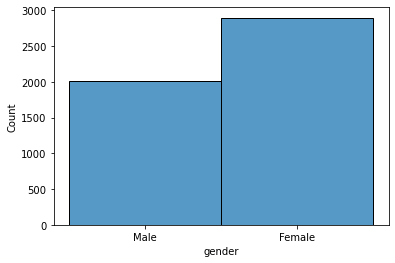

In [52]:
sns.histplot(data = df, x = 'gender')

### Age

<AxesSubplot:xlabel='age'>

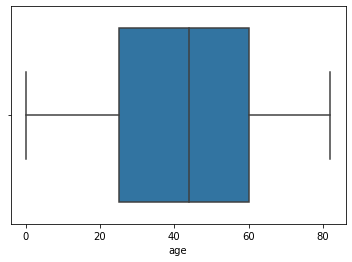

In [53]:
sns.boxplot(data = df, x = 'age')

### Hypertension

<AxesSubplot:xlabel='hypertension', ylabel='Count'>

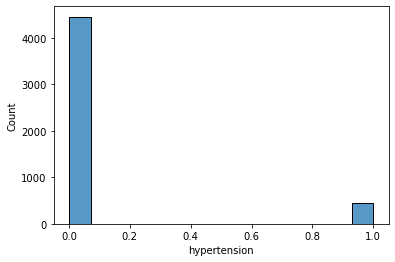

In [54]:
sns.histplot(data = df, x = 'hypertension')

### Heart Disease

<AxesSubplot:xlabel='heart_disease', ylabel='Count'>

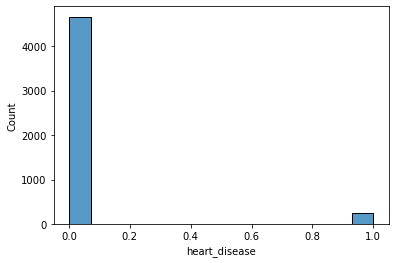

In [55]:
sns.histplot(data = df, x = 'heart_disease')

### Ever Married

<AxesSubplot:xlabel='ever_married', ylabel='Count'>

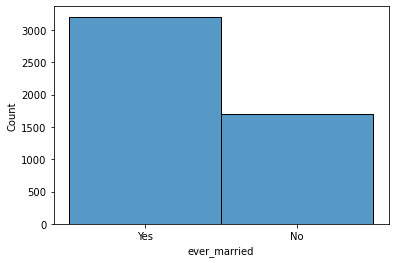

In [56]:
sns.histplot(data = df, x = 'ever_married')

### Work Type

<AxesSubplot:xlabel='work_type', ylabel='Count'>

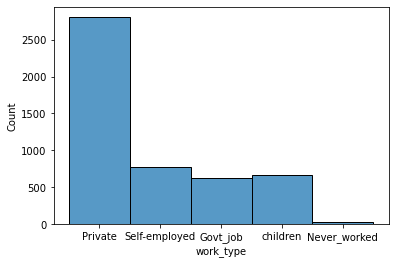

In [57]:
sns.histplot(data = df, x = 'work_type')

### Rural or Urban Residence

<AxesSubplot:xlabel='Residence_type', ylabel='Count'>

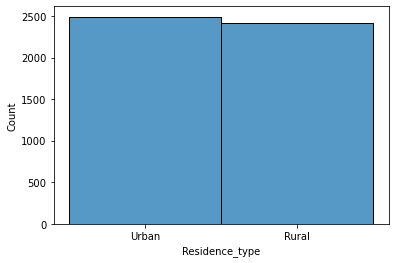

In [58]:
sns.histplot(data = df, x = 'Residence_type')

### Average Glucose Level

<AxesSubplot:xlabel='avg_glucose_level'>

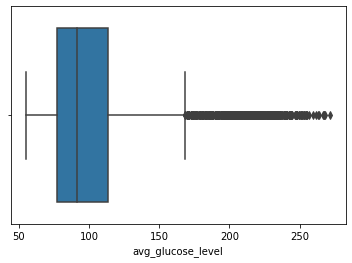

In [59]:
sns.boxplot(data = df, x = 'avg_glucose_level')

### BMI

<AxesSubplot:xlabel='bmi'>

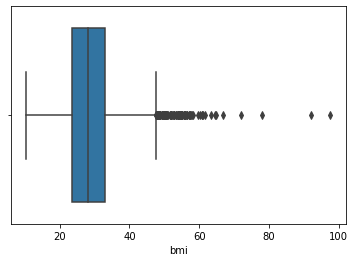

In [60]:
sns.boxplot( data = df, x = 'bmi')

### Smoking Status

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

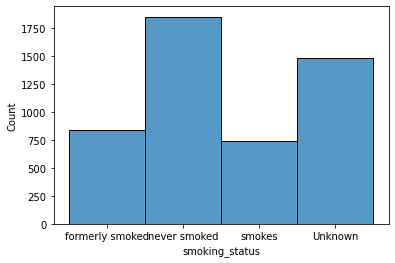

In [61]:
sns.histplot(data = df, x = 'smoking_status')

## Target

### Has the patient had a stroke?

<AxesSubplot:xlabel='stroke', ylabel='Count'>

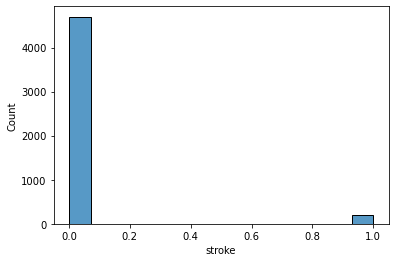

In [62]:
sns.histplot(data = df, x = 'stroke')

In [63]:
df['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

## Correlation Heatmap

<AxesSubplot:>

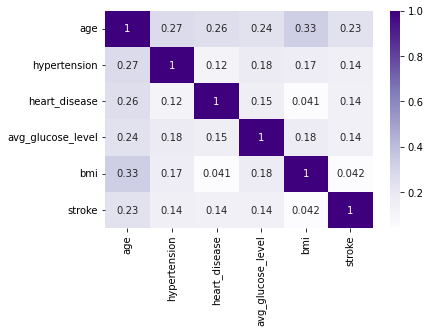

In [64]:
sns.heatmap(data = df.corr(), cmap = 'Purples', annot = True)